In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
ls data

men_shoes.csv


In [0]:
cd 'drive/My Drive/Colab Notebooks/dw_matrix'

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape

(18280, 48)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [0]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

63.968341227870624

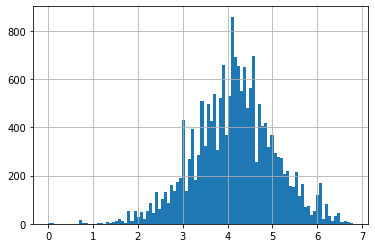

In [0]:

np.log1p(df['prices_amountmin']).hist(bins=100)

In [0]:
median_price = np.median(df['prices_amountmin'])

y_true = df['prices_amountmin']
y_pred = [median_price] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [0]:
feats = ['brand_cat', 'manufacturer_cat']

In [0]:
def run_model(feats):
      X = df[ feats ].values
      y = df['prices_amountmin'].values
      model = DecisionTreeRegressor(max_depth=5)
      scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
      return np.std(scores), np.mean(scores)

In [0]:
run_model(feats)

(4.311223231615435, -58.53930419908596)

In [0]:
!git add dw_day_4.ipynb
!git config --global user.email "boguskorecki@gmail.com"
!git config --global user.name "Bogdan K."
!git commit -m "Simple Decision Tree model to predict price with "
!git push -u origin master